# Find The Flag
This project aims to develop a Decision Tree Model to predict from which continent a particular flag comes from. 


**Data sources**


The original data is available at UCI Machine Learning Repository in [here](https://archive.ics.uci.edu/ml/datasets/Flags).

The information included is:


- `name`: Name of the country concerned
- `landmass`: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
- `bars`: Number of vertical bars in the flag
- `stripes`: Number of horizontal stripes in the flag
- `colours`: Number of different colours in the flag
- `red`: 0 if red absent, 1 if red present in the flag

`…`

- `mainhue`: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
- `circles`: Number of circles in the flag
- `crosses`: Number of (upright) crosses
- `saltires`: Number of diagonal crosses
- `quarters`: Number of quartered sections
- `sunstars`: Number of sun or star symbols

## Import Python Modules

To start, import the preliminary modules that will be used in this project:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

## Loading Data

The initial step involves saving the dataset into `df` in order to have a sense about what the data looks like.

In [4]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


## Pre-Analysis

Following the data load, it's important to know the distribution of flags by landmass

In [11]:
count_landmass = df['landmass'].value_counts()
ratio_landmass = df['landmass'].value_counts(normalize=True)

print('Landmasses-> 1 = N.America, 2 = S.America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania')
print('Number of flags per landmass:')
print(count_landmass)
print('Ratio of flags per landmass:')
print(ratio_landmass)

Landmasses-> 1 = N.America, 2 = S.America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania
Number of flags per landmass:
landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64
Ratio of flags per landmass:
landmass
4    0.268041
5    0.201031
3    0.180412
1    0.159794
6    0.103093
2    0.087629
Name: proportion, dtype: float64


For this project, the focus will be on two continents: `Europe` and `Oceania`.

In [107]:
filter_landmass = [3, 6] # Europe and Oceania
df_36 = df[df['landmass'].isin(filter_landmass)]
labels = df_36['landmass'] # The labels of the continents
df_36.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
10,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red


Moving forward, a certain amount of variables are used as predictors of the model. It's important to understand this predictors.

In [32]:
#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', \
       'bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

df_36.groupby('landmass')[var].mean().T

landmass,3,6
red,0.828571,0.80
green,0.200000,0.20
blue,0.514286,0.80
gold,0.428571,0.60
white,0.771429,0.95
black,0.171429,0.15
orange,0.057143,0.15
bars,0.628571,0.00
stripes,1.285714,0.40
circles,0.028571,0.15


The next step, is to analyze the types of the predictor variables. As shown below, the variable `mainhue` is of type object. This variable is adapted using one-hot encodings using `get_dummies()` to be able to use the data for training.

In [114]:
#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', \
       'mainhue', 'bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

print(df[var].dtypes) # data type of mainhue

data = pd.get_dummies(df_36[var], dtype=int)
data.head()

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


,red,green,blue,gold,white,black,orange,bars,stripes,circles,...,quarters,sunstars,triangle,animate,mainhue_black,mainhue_blue,mainhue_gold,mainhue_green,mainhue_red,mainhue_white
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,1,0,1,1,0,0,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10,1,0,1,0,1,0,0,0,0,0,...,1,6,0,0,0,1,0,0,0,0
11,1,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0


## Model Training
Moving forward, the dataset is divided into training and testing sets for training the model and assesing the performance.

In [130]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

# The shapes match between the datasets
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(33, 22)
(33,)
(22, 22)
(22,)


Having separated the data into training and testing sets, the hyperparameter `max_depth` is tested with a range of 1 to 20 to find which depth has the best accuracy. From the results below, the `depth=3` has the greates accuracy of 0.909.

In [131]:
# Model that receives the depth, fit and assess the model and returns the score
def fit_model(x_train, x_test, y_train, y_test, depth):
    # Fit the model
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth)
    tree.fit(x_train, y_train)

    # Assets model's performance
    score = tree.score(x_test, y_test)
    print(f'Depth: {depth} - Score: {score}')

    return score

depths = range(1, 21)
scores = []
for depth in depths:
    score = fit_model(x_train, x_test, y_train, y_test, depth)
    scores.append(score)

Depth: 1 - Score: 0.8636363636363636
Depth: 2 - Score: 0.8636363636363636
Depth: 3 - Score: 0.9090909090909091
Depth: 4 - Score: 0.8636363636363636
Depth: 5 - Score: 0.8636363636363636
Depth: 6 - Score: 0.8636363636363636
Depth: 7 - Score: 0.8636363636363636
Depth: 8 - Score: 0.7727272727272727
Depth: 9 - Score: 0.7727272727272727
Depth: 10 - Score: 0.7727272727272727
Depth: 11 - Score: 0.7727272727272727
Depth: 12 - Score: 0.7727272727272727
Depth: 13 - Score: 0.7727272727272727
Depth: 14 - Score: 0.7727272727272727
Depth: 15 - Score: 0.7727272727272727
Depth: 16 - Score: 0.7727272727272727
Depth: 17 - Score: 0.7727272727272727
Depth: 18 - Score: 0.7727272727272727
Depth: 19 - Score: 0.7727272727272727
Depth: 20 - Score: 0.7727272727272727


In order to understand better the results, the depth of the model vs the score are plotted. 

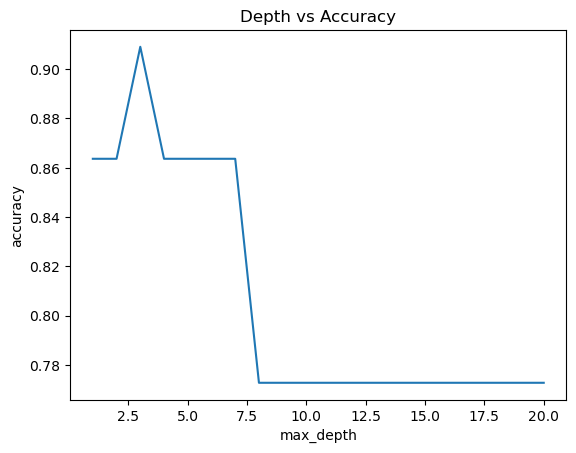

<Figure size 640x480 with 0 Axes>

In [133]:
plt.plot(depths, scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Depth vs Accuracy')
plt.show()
plt.clf()

To visualize the results, the module `tree` is used to plot the physical decision tree.

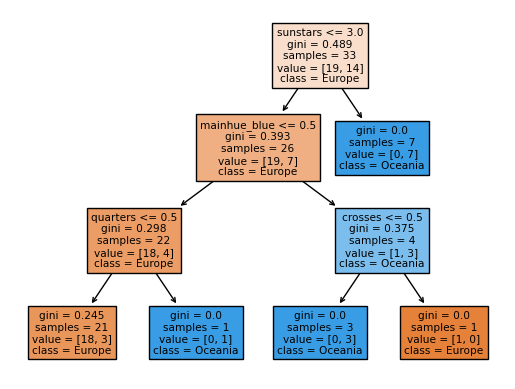

<Figure size 640x480 with 0 Axes>

In [137]:
# Fit the model
model_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
model_tree.fit(x_train, y_train)

tree.plot_tree(model_tree, feature_names=x_train.columns.to_list(), class_names = ['Europe', 'Oceania'],filled=True)
plt.show()
plt.clf()

The next step is improving the value of the hyperparameter `ccp_alpha`. The process is similar as the previous `max_depth` optimization. As the curve of the scores are plotted, the best ccp_alpha value is shown. From the graph below, the ccp_alpha with the most accuracy is at the start. 

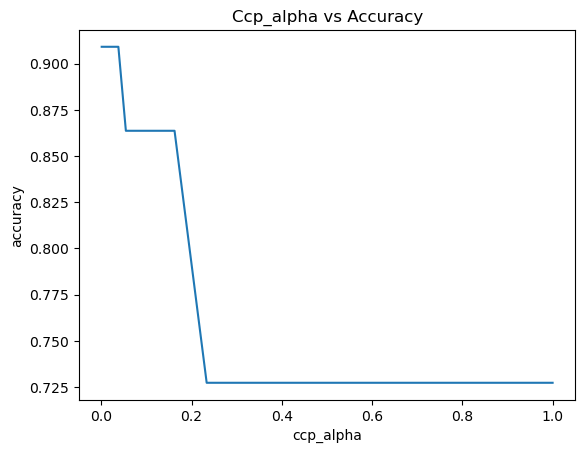

<Figure size 640x480 with 0 Axes>

In [150]:
def fit_model(x_train, x_test, y_train, y_test, ccp_alpha):
    # Fit the model
    tree = DecisionTreeClassifier(random_state=42, max_depth=3, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y_train)

    score = tree.score(x_test, y_test)

    return score

acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for ccp_val in ccp:
    score = fit_model(x_train, x_test, y_train, y_test, ccp_val)
    acc_pruned.append(score)

plt.plot(ccp, acc_pruned)
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.title('Ccp_alpha vs Accuracy')
plt.show()
plt.clf()

As the final step, the model is created using the depth and ccp_alpha that give the most accuracy. Below is a graph of the logical representation of the tree.

Accuracy: 0.9090909090909091


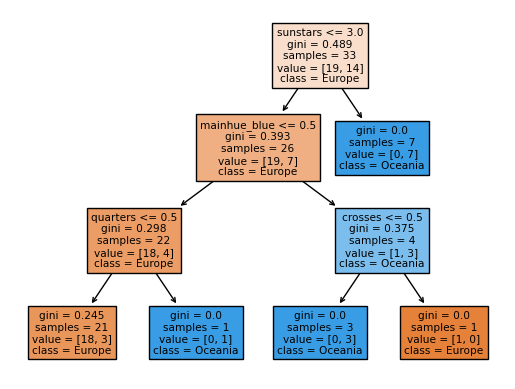

<Figure size 640x480 with 0 Axes>

In [152]:
# Fit the model
model_tree = DecisionTreeClassifier(random_state=42, max_depth=3, ccp_alpha=0.01)
model_tree.fit(x_train, y_train)
print(f'Accuracy: {model_tree.score(x_test, y_test)}')

tree.plot_tree(model_tree, feature_names=x_train.columns.to_list(), class_names = ['Europe', 'Oceania'],filled=True)
plt.show()
plt.clf()

## Conclusion
This project succesfully used the Decision Tree algorithm model to predict from which continent a particular flag comes from. The use of plotting the accuracy of the model while testing and tuning different hyperparameters helped in finding the optimal
by predicting if an individual had breast cancer or not. The use of plotting the accuracy of the model as a function of different values of K helped at finding the optimal K value for creating a succesfull model with 0.96 of accuracy.